In [1]:
### Packages

using Printf
using LinearAlgebra
using JLD
using QuadGK
using Statistics
using PyCall
using PyPlot
using LaTeXStrings
using GadgetIO
using GadgetUnits
using GadgetGalaxies
using Unitful
using UnitfulAstro
using Missings
using HypothesisTests
using Distributions
using CSV
using DataFrames
using Cosmology
using Suppressor
using RollingFunctions

In [117]:
# Playground
#rolling(median, δj_abs, assembly_STARS["ϕ_flip"], 50)
#movingaverage(g, n) = [i < n ? mean(g[begin:i]) : mean(g[i-n+1:i]) for i in 1:length(g)]

#movingaverage(δj_abs, 100)

In [2]:
### Settings

box         = "/HydroSims/Magneticum/Box4/uhr_test"
input_dir   = "/home/moon/sfortune/spinevo/halostories_v20211007_min0.0Gyr"
output_dir  = "/home/moon/sfortune/spinevo/mergerimpact"
mass_ST_thr = 1e10

storyfilelist   = readdir(input_dir)
print("done")


done

In [3]:
assembly_STARS  = load(joinpath(output_dir, "assembly_Mstar_$(mass_ST_thr).jld"), "assembly_STARS")
assembly_DM     = load(joinpath(output_dir, "assembly_Mstar_$(mass_ST_thr).jld"), "assembly_DM")
assembly_GAS    = load(joinpath(output_dir, "assembly_Mstar_$(mass_ST_thr).jld"), "assembly_GAS")


Dict{String, Array} with 32 entries:
  "I_SUB"         => Union{Missing, Int64}[0, 0, 0, 466, 671, 656, 715, 719, 73…
  "M_MISSED"      => Union{Missing, Float64}[missing, missing, missing, missing…
  "Merger_Map"    => Union{Missing, Float64}[6.18554e6 0.0 … 0.0 0.0; 6.18554e6…
  "M_fromJ"       => Union{Missing, Float64}[2.28766e11, 1.6574e11, 1.37734e11,…
  "SNAP"          => Union{Missing, Int64}[40, 44, 48, 52, 58, 60, 64, 68, 72, …
  "M2_MISSED"     => Union{Missing, Float64}[missing, missing, missing, missing…
  "δM2_felix"     => Union{Missing, Float64}[1.58538e12, -9.58523e10, -4.9858e9…
  "M2_CONSIDERED" => Union{Missing, Float64}[6.18554e6, 8.63533e10, 1.57966e10,…
  "REDSHIFT"      => Union{Missing, Float64}[1.70635, 1.47758, 1.32344, 1.17889…
  "M2_felix"      => Union{Missing, Float64}[1.58538e12, 1.48953e12, 1.48455e12…
  "ϕ_flip"        => Union{Missing, Float64}[113.102, 83.4231, 30.8034, 41.519,…
  "M_MM"          => Union{Missing, Float64}[6.18554e6, 1.96312e10, miss

# Assemble Data

assembly_STARS = Dict(
    "SNAP"          => missings(Int64  , 0),
    "I_SUB"         => missings(Int64  , 0),
    "N_MERGERS"     => missings(Int64  , 0),
    "ID_ISUB"       => missings(Int64  , 0),
    "ID_Mfelix"     => missings(Float64, 0),
    "ID_M2"         => missings(Float64, 0),
    "REDSHIFT"      => missings(Float64, 0),
    "LOOKBACKTIME"  => missings(Float64, 0),
    "M_MM"          => missings(Float64, 0),
    "M2_MM"         => missings(Float64, 0),
    "δM_felix"      => missings(Float64, 0), 
    "δM2_felix"     => missings(Float64, 0), 
    "δM_fromJ"      => missings(Float64, 0), 
    "M_felix"       => missings(Float64, 0), 
    "M2_felix"      => missings(Float64, 0), 
    "M_fromJ"       => missings(Float64, 0), 
    "ϕ_flip"        => missings(Float64, 0), 
    "M_MERGERS"     => missings(Float64, 0),
    "M_MISSED"      => missings(Float64, 0), 
    "M_CONSIDERED"  => missings(Float64, 0),  
    "M2_MERGERS"    => missings(Float64, 0),
    "M2_MISSED"     => missings(Float64, 0), 
    "M2_CONSIDERED" => missings(Float64, 0),  
    "BVAL"          => missings(Float64, 0), 
    "δBVAL"         => missings(Float64, 0), 
    "J_MMorbital"   => missings(Float64, 3, 0), 
    "J_SUMorbital"  => missings(Float64, 3, 0), 
    "δJ_main"       => missings(Float64, 3, 0), 
    "J_main"        => missings(Float64, 3, 0), 
    "j_main"        => missings(Float64, 3, 0), 
    "δj_main"       => missings(Float64, 3, 0),
    "Merger_Map"    => missings(Float64, 7, 0))

assembly_GAS = Dict(
    "SNAP"          => missings(Int64  , 0),
    "I_SUB"         => missings(Int64  , 0),
    "N_MERGERS"     => missings(Int64  , 0),
    "ID_ISUB"       => missings(Int64  , 0),
    "ID_Mfelix"     => missings(Float64, 0),
    "ID_M2"         => missings(Float64, 0),
    "REDSHIFT"      => missings(Float64, 0),
    "LOOKBACKTIME"  => missings(Float64, 0),
    "M_MM"          => missings(Float64, 0),
    "M2_MM"         => missings(Float64, 0),
    "δM_felix"      => missings(Float64, 0), 
    "δM2_felix"     => missings(Float64, 0), 
    "δM_fromJ"      => missings(Float64, 0), 
    "M_felix"       => missings(Float64, 0), 
    "M2_felix"      => missings(Float64, 0), 
    "M_fromJ"       => missings(Float64, 0), 
    "ϕ_flip"        => missings(Float64, 0), 
    "M_MERGERS"     => missings(Float64, 0),
    "M_MISSED"      => missings(Float64, 0), 
    "M_CONSIDERED"  => missings(Float64, 0),  
    "M2_MERGERS"    => missings(Float64, 0),
    "M2_MISSED"     => missings(Float64, 0), 
    "M2_CONSIDERED" => missings(Float64, 0),  
    "BVAL"          => missings(Float64, 0), 
    "δBVAL"         => missings(Float64, 0), 
    "J_MMorbital"   => missings(Float64, 3, 0), 
    "J_SUMorbital"  => missings(Float64, 3, 0), 
    "δJ_main"       => missings(Float64, 3, 0), 
    "J_main"        => missings(Float64, 3, 0), 
    "j_main"        => missings(Float64, 3, 0), 
    "δj_main"       => missings(Float64, 3, 0),
    "Merger_Map"    => missings(Float64, 7, 0))

assembly_DM = Dict(
    "SNAP"          => missings(Int64  , 0),
    "I_SUB"         => missings(Int64  , 0),
    "N_MERGERS"     => missings(Int64  , 0),
    "ID_ISUB"       => missings(Int64  , 0),
    "ID_Mfelix"     => missings(Float64, 0),
    "ID_M2"         => missings(Float64, 0),
    "REDSHIFT"      => missings(Float64, 0),
    "LOOKBACKTIME"  => missings(Float64, 0),
    "M_MM"          => missings(Float64, 0),
    "M2_MM"         => missings(Float64, 0),
    "δM_felix"      => missings(Float64, 0), 
    "δM2_felix"     => missings(Float64, 0), 
    "δM_fromJ"      => missings(Float64, 0), 
    "M_felix"       => missings(Float64, 0), 
    "M2_felix"      => missings(Float64, 0), 
    "M_fromJ"       => missings(Float64, 0), 
    "ϕ_flip"        => missings(Float64, 0), 
    "M_MERGERS"     => missings(Float64, 0),
    "M_MISSED"      => missings(Float64, 0), 
    "M_CONSIDERED"  => missings(Float64, 0),  
    "M2_MERGERS"    => missings(Float64, 0),
    "M2_MISSED"     => missings(Float64, 0), 
    "M2_CONSIDERED" => missings(Float64, 0),  
    "BVAL"          => missings(Float64, 0), 
    "δBVAL"         => missings(Float64, 0), 
    "J_MMorbital"   => missings(Float64, 3, 0), 
    "J_SUMorbital"  => missings(Float64, 3, 0), 
    "δJ_main"       => missings(Float64, 3, 0), 
    "J_main"        => missings(Float64, 3, 0), 
    "j_main"        => missings(Float64, 3, 0), 
    "δj_main"       => missings(Float64, 3, 0),
    "Merger_Map"    => missings(Float64, 7, 0))


limit_filelist  = length(storyfilelist)
for ii in 1:limit_filelist
    print("$ii ")
    merger_collection_STARS = load(joinpath(input_dir, storyfilelist[ii]), "merger_collection_STARS")
    merger_collection_GAS   = load(joinpath(input_dir, storyfilelist[ii]), "merger_collection_GAS")
    merger_collection_DM    = load(joinpath(input_dir, storyfilelist[ii]), "merger_collection_DM")
    for i in 1:length(merger_collection_STARS["SNAP"])
        if merger_collection_STARS["M2_felix"][i] > mass_ST_thr
            assembly_STARS["SNAP"         ] = vcat( assembly_STARS["SNAP"         ], merger_collection_STARS["SNAP"         ][i] )
            assembly_STARS["I_SUB"        ] = vcat( assembly_STARS["I_SUB"        ], merger_collection_STARS["I_SUB"        ][i] )
            assembly_STARS["ID_ISUB"      ] = vcat( assembly_STARS["ID_ISUB"      ], merger_collection_STARS["ID_ISUB"      ][i] )
            assembly_STARS["ID_Mfelix"    ] = vcat( assembly_STARS["ID_Mfelix"    ], merger_collection_STARS["ID_Mfelix"    ][i] )
            assembly_STARS["ID_M2"        ] = vcat( assembly_STARS["ID_M2"        ], merger_collection_STARS["ID_M2"        ][i] )
            assembly_STARS["REDSHIFT"     ] = vcat( assembly_STARS["REDSHIFT"     ], merger_collection_STARS["REDSHIFT"     ][i] )
            assembly_STARS["LOOKBACKTIME" ] = vcat( assembly_STARS["LOOKBACKTIME" ], merger_collection_STARS["LOOKBACKTIME" ][i] )
            assembly_STARS["M_MM"         ] = vcat( assembly_STARS["M_MM"         ], merger_collection_STARS["M_MM"         ][i] )
            assembly_STARS["M2_MM"        ] = vcat( assembly_STARS["M2_MM"        ], merger_collection_STARS["M2_MM"        ][i] )
            assembly_STARS["δM_felix"     ] = vcat( assembly_STARS["δM_felix"     ], merger_collection_STARS["δM_felix"     ][i] )
            assembly_STARS["δM2_felix"    ] = vcat( assembly_STARS["δM2_felix"    ], merger_collection_STARS["δM2_felix"    ][i] )
            assembly_STARS["δM_fromJ"     ] = vcat( assembly_STARS["δM_fromJ"     ], merger_collection_STARS["δM_fromJ"     ][i] )
            assembly_STARS["M_felix"      ] = vcat( assembly_STARS["M_felix"      ], merger_collection_STARS["M_felix"      ][i] )
            assembly_STARS["M2_felix"     ] = vcat( assembly_STARS["M2_felix"     ], merger_collection_STARS["M2_felix"     ][i] )
            assembly_STARS["M_fromJ"      ] = vcat( assembly_STARS["M_fromJ"      ], merger_collection_STARS["M_fromJ"      ][i] )
            assembly_STARS["ϕ_flip"       ] = vcat( assembly_STARS["ϕ_flip"       ], merger_collection_STARS["ϕ_flip"       ][i] )
            assembly_STARS["N_MERGERS"    ] = vcat( assembly_STARS["N_MERGERS"    ], merger_collection_STARS["N_MERGERS"    ][i] )
            assembly_STARS["M_MERGERS"    ] = vcat( assembly_STARS["M_MERGERS"    ], merger_collection_STARS["M_MERGERS"    ][i] )
            assembly_STARS["M_MISSED"     ] = vcat( assembly_STARS["M_MISSED"     ], merger_collection_STARS["M_MISSED"     ][i] )
            assembly_STARS["M_CONSIDERED" ] = vcat( assembly_STARS["M_CONSIDERED" ], merger_collection_STARS["M_CONSIDERED" ][i] )
            assembly_STARS["M2_MERGERS"   ] = vcat( assembly_STARS["M2_MERGERS"   ], merger_collection_STARS["M2_MERGERS"   ][i] )
            assembly_STARS["M2_MISSED"    ] = vcat( assembly_STARS["M2_MISSED"    ], merger_collection_STARS["M2_MISSED"    ][i] )
            assembly_STARS["M2_CONSIDERED"] = vcat( assembly_STARS["M2_CONSIDERED"], merger_collection_STARS["M2_CONSIDERED"][i] )
            assembly_STARS["BVAL"         ] = vcat( assembly_STARS["BVAL"         ], merger_collection_STARS["BVAL"         ][i] )
            assembly_STARS["δBVAL"        ] = vcat( assembly_STARS["δBVAL"        ], merger_collection_STARS["δBVAL"        ][i] )
            assembly_STARS["J_MMorbital"  ] = hcat( assembly_STARS["J_MMorbital"  ], merger_collection_STARS["J_MMorbital"  ][:,i] )
            assembly_STARS["J_SUMorbital" ] = hcat( assembly_STARS["J_SUMorbital" ], merger_collection_STARS["J_SUMorbital" ][:,i] )
            assembly_STARS["δJ_main"      ] = hcat( assembly_STARS["δJ_main"      ], merger_collection_STARS["δJ_main"      ][:,i] )
            assembly_STARS["J_main"       ] = hcat( assembly_STARS["J_main"       ], merger_collection_STARS["J_main"       ][:,i] )
            assembly_STARS["j_main"       ] = hcat( assembly_STARS["j_main"       ], merger_collection_STARS["j_main"       ][:,i] )
            assembly_STARS["δj_main"      ] = hcat( assembly_STARS["δj_main"      ], merger_collection_STARS["δj_main"      ][:,i] )
            #println("$(storyfilelist[ii])   $i   $(merger_collection_STARS["Merger_Map"][:,i])")
            assembly_STARS["Merger_Map"   ] = hcat( assembly_STARS["Merger_Map"   ], merger_collection_STARS["Merger_Map"   ][:,1+sum(merger_collection_STARS["N_MERGERS"][1:i-1]):sum(merger_collection_STARS["N_MERGERS"][1:i])] )
            assembly_GAS["SNAP"         ]   = vcat( assembly_GAS["SNAP"         ], merger_collection_GAS["SNAP"         ][i] )
            assembly_GAS["I_SUB"        ]   = vcat( assembly_GAS["I_SUB"        ], merger_collection_GAS["I_SUB"        ][i] )
            assembly_GAS["ID_ISUB"      ]   = vcat( assembly_GAS["ID_ISUB"      ], merger_collection_GAS["ID_ISUB"      ][i] )
            assembly_GAS["ID_Mfelix"    ]   = vcat( assembly_GAS["ID_Mfelix"    ], merger_collection_GAS["ID_Mfelix"    ][i] )
            assembly_GAS["ID_M2"        ]   = vcat( assembly_GAS["ID_M2"        ], merger_collection_GAS["ID_M2"        ][i] )
            assembly_GAS["REDSHIFT"     ]   = vcat( assembly_GAS["REDSHIFT"     ], merger_collection_GAS["REDSHIFT"     ][i] )
            assembly_GAS["LOOKBACKTIME" ]   = vcat( assembly_GAS["LOOKBACKTIME" ], merger_collection_GAS["LOOKBACKTIME" ][i] )
            assembly_GAS["M_MM"         ]   = vcat( assembly_GAS["M_MM"         ], merger_collection_GAS["M_MM"         ][i] )
            assembly_GAS["M2_MM"        ]   = vcat( assembly_GAS["M2_MM"        ], merger_collection_GAS["M2_MM"        ][i] )
            assembly_GAS["δM_felix"     ]   = vcat( assembly_GAS["δM_felix"     ], merger_collection_GAS["δM_felix"     ][i] )
            assembly_GAS["δM2_felix"    ]   = vcat( assembly_GAS["δM2_felix"    ], merger_collection_GAS["δM2_felix"    ][i] )
            assembly_GAS["δM_fromJ"     ]   = vcat( assembly_GAS["δM_fromJ"     ], merger_collection_GAS["δM_fromJ"     ][i] )
            assembly_GAS["M_felix"      ]   = vcat( assembly_GAS["M_felix"      ], merger_collection_GAS["M_felix"      ][i] )
            assembly_GAS["M2_felix"     ]   = vcat( assembly_GAS["M2_felix"     ], merger_collection_GAS["M2_felix"     ][i] )
            assembly_GAS["M_fromJ"      ]   = vcat( assembly_GAS["M_fromJ"      ], merger_collection_GAS["M_fromJ"      ][i] )
            assembly_GAS["ϕ_flip"       ]   = vcat( assembly_GAS["ϕ_flip"       ], merger_collection_GAS["ϕ_flip"       ][i] )
            assembly_GAS["N_MERGERS"    ]   = vcat( assembly_GAS["N_MERGERS"    ], merger_collection_GAS["N_MERGERS"    ][i] )
            assembly_GAS["M_MERGERS"    ]   = vcat( assembly_GAS["M_MERGERS"    ], merger_collection_GAS["M_MERGERS"    ][i] )
            assembly_GAS["M_MISSED"     ]   = vcat( assembly_GAS["M_MISSED"     ], merger_collection_GAS["M_MISSED"     ][i] )
            assembly_GAS["M_CONSIDERED" ]   = vcat( assembly_GAS["M_CONSIDERED" ], merger_collection_GAS["M_CONSIDERED" ][i] )
            assembly_GAS["M2_MERGERS"   ]   = vcat( assembly_GAS["M2_MERGERS"   ], merger_collection_GAS["M2_MERGERS"   ][i] )
            assembly_GAS["M2_MISSED"    ]   = vcat( assembly_GAS["M2_MISSED"    ], merger_collection_GAS["M2_MISSED"    ][i] )
            assembly_GAS["M2_CONSIDERED"]   = vcat( assembly_GAS["M2_CONSIDERED"], merger_collection_GAS["M2_CONSIDERED"][i] )
            assembly_GAS["BVAL"         ]   = vcat( assembly_GAS["BVAL"         ], merger_collection_GAS["BVAL"         ][i] )
            assembly_GAS["δBVAL"        ]   = vcat( assembly_GAS["δBVAL"        ], merger_collection_GAS["δBVAL"        ][i] )
            assembly_GAS["J_MMorbital"  ]   = hcat( assembly_GAS["J_MMorbital"  ], merger_collection_GAS["J_MMorbital"  ][:,i] )
            assembly_GAS["J_SUMorbital" ]   = hcat( assembly_GAS["J_SUMorbital" ], merger_collection_GAS["J_SUMorbital" ][:,i] )
            assembly_GAS["δJ_main"      ]   = hcat( assembly_GAS["δJ_main"      ], merger_collection_GAS["δJ_main"      ][:,i] )
            assembly_GAS["J_main"       ]   = hcat( assembly_GAS["J_main"       ], merger_collection_GAS["J_main"       ][:,i] )
            assembly_GAS["j_main"       ]   = hcat( assembly_GAS["j_main"       ], merger_collection_GAS["j_main"       ][:,i] )
            assembly_GAS["δj_main"      ]   = hcat( assembly_GAS["δj_main"      ], merger_collection_GAS["δj_main"      ][:,i] )
            assembly_GAS["Merger_Map"   ]   = hcat( assembly_GAS["Merger_Map"   ], merger_collection_GAS["Merger_Map"   ][:,1+sum(merger_collection_GAS["N_MERGERS"][1:i-1]):sum(merger_collection_GAS["N_MERGERS"][1:i])] )
            assembly_DM["SNAP"         ]    = vcat( assembly_DM["SNAP"         ], merger_collection_DM["SNAP"         ][i] )
            assembly_DM["I_SUB"        ]    = vcat( assembly_DM["I_SUB"        ], merger_collection_DM["I_SUB"        ][i] )
            assembly_DM["ID_ISUB"      ]    = vcat( assembly_DM["ID_ISUB"      ], merger_collection_DM["ID_ISUB"      ][i] )
            assembly_DM["ID_Mfelix"    ]    = vcat( assembly_DM["ID_Mfelix"    ], merger_collection_DM["ID_Mfelix"    ][i] )
            assembly_DM["ID_M2"        ]    = vcat( assembly_DM["ID_M2"        ], merger_collection_DM["ID_M2"        ][i] )
            assembly_DM["REDSHIFT"     ]    = vcat( assembly_DM["REDSHIFT"     ], merger_collection_DM["REDSHIFT"     ][i] )
            assembly_DM["LOOKBACKTIME" ]    = vcat( assembly_DM["LOOKBACKTIME" ], merger_collection_DM["LOOKBACKTIME" ][i] )
            assembly_DM["M_MM"         ]    = vcat( assembly_DM["M_MM"         ], merger_collection_DM["M_MM"         ][i] )
            assembly_DM["M2_MM"        ]    = vcat( assembly_DM["M2_MM"        ], merger_collection_DM["M2_MM"        ][i] )
            assembly_DM["δM_felix"     ]    = vcat( assembly_DM["δM_felix"     ], merger_collection_DM["δM_felix"     ][i] )
            assembly_DM["δM2_felix"    ]    = vcat( assembly_DM["δM2_felix"    ], merger_collection_DM["δM2_felix"    ][i] )
            assembly_DM["δM_fromJ"     ]    = vcat( assembly_DM["δM_fromJ"     ], merger_collection_DM["δM_fromJ"     ][i] )
            assembly_DM["M_felix"      ]    = vcat( assembly_DM["M_felix"      ], merger_collection_DM["M_felix"      ][i] )
            assembly_DM["M2_felix"     ]    = vcat( assembly_DM["M2_felix"     ], merger_collection_DM["M2_felix"     ][i] )
            assembly_DM["M_fromJ"      ]    = vcat( assembly_DM["M_fromJ"      ], merger_collection_DM["M_fromJ"      ][i] )
            assembly_DM["ϕ_flip"       ]    = vcat( assembly_DM["ϕ_flip"       ], merger_collection_DM["ϕ_flip"       ][i] )
            assembly_DM["N_MERGERS"    ]    = vcat( assembly_DM["N_MERGERS"    ], merger_collection_DM["N_MERGERS"    ][i] )
            assembly_DM["M_MERGERS"    ]    = vcat( assembly_DM["M_MERGERS"    ], merger_collection_DM["M_MERGERS"    ][i] )
            assembly_DM["M_MISSED"     ]    = vcat( assembly_DM["M_MISSED"     ], merger_collection_DM["M_MISSED"     ][i] )
            assembly_DM["M_CONSIDERED" ]    = vcat( assembly_DM["M_CONSIDERED" ], merger_collection_DM["M_CONSIDERED" ][i] )
            assembly_DM["M2_MERGERS"   ]    = vcat( assembly_DM["M2_MERGERS"   ], merger_collection_DM["M2_MERGERS"   ][i] )
            assembly_DM["M2_MISSED"    ]    = vcat( assembly_DM["M2_MISSED"    ], merger_collection_DM["M2_MISSED"    ][i] )
            assembly_DM["M2_CONSIDERED"]    = vcat( assembly_DM["M2_CONSIDERED"], merger_collection_DM["M2_CONSIDERED"][i] )
            assembly_DM["BVAL"         ]    = vcat( assembly_DM["BVAL"         ], merger_collection_DM["BVAL"         ][i] )
            assembly_DM["δBVAL"        ]    = vcat( assembly_DM["δBVAL"        ], merger_collection_DM["δBVAL"        ][i] )
            assembly_DM["J_MMorbital"  ]    = hcat( assembly_DM["J_MMorbital"  ], merger_collection_DM["J_MMorbital"  ][:,i] )
            assembly_DM["J_SUMorbital" ]    = hcat( assembly_DM["J_SUMorbital" ], merger_collection_DM["J_SUMorbital" ][:,i] )
            assembly_DM["δJ_main"      ]    = hcat( assembly_DM["δJ_main"      ], merger_collection_DM["δJ_main"      ][:,i] )
            assembly_DM["J_main"       ]    = hcat( assembly_DM["J_main"       ], merger_collection_DM["J_main"       ][:,i] )
            assembly_DM["j_main"       ]    = hcat( assembly_DM["j_main"       ], merger_collection_DM["j_main"       ][:,i] )
            assembly_DM["δj_main"      ]    = hcat( assembly_DM["δj_main"      ], merger_collection_DM["δj_main"      ][:,i] )
            assembly_DM["Merger_Map"   ]    = hcat( assembly_DM["Merger_Map"   ], merger_collection_DM["Merger_Map"   ][:,1+sum(merger_collection_DM["N_MERGERS"][1:i-1]):sum(merger_collection_DM["N_MERGERS"][1:i])] )
        end
    end
end

save(joinpath(output_dir, "assembly_Mstar_$(mass_ST_thr).jld"), 
    "assembly_STARS",   assembly_STARS,
    "assembly_DM",      assembly_DM,
    "assembly_GAS",     assembly_GAS)


println("\n\n$(size(assembly_STARS["J_main"]))")
println("$(size(assembly_GAS["J_main"]))")
println("$(size(assembly_DM["J_main"]))")
println("$(size(assembly_STARS["Merger_Map"]))   =   $(sum(assembly_STARS["N_MERGERS"]))   ?")
println("$(size(assembly_GAS["Merger_Map"]))   =   $(sum(assembly_GAS["N_MERGERS"]))   ?")
println("$(size(assembly_DM["Merger_Map"]))   =   $(sum(assembly_DM["N_MERGERS"]))   ?")

In [4]:

#array of max merger indices
#MMdm_indices    = missings(Int64, length(assembly_DM["M2_felix"]))
#m2_felix        = missings(Float64, length(assembly_DM["M2_felix"]) )
#m2_mm           = missings(Float64, length(assembly_DM["M2_felix"]) )
main_mm_indices = missings(Int64, 0)
MMdm_indices    = missings(Int64, 0)
for i in 1:200#length(assembly_DM["M2_felix"])
    #println("$(sum( assembly_DM["Merger_Map"][2, 1+sum(assembly_DM["N_MERGERS"][1:i-1]) : sum(assembly_DM["N_MERGERS"][1:i])] ) > 0.)   $(sum( assembly_DM["Merger_Map"][2, 1+sum(assembly_DM["N_MERGERS"][1:i-1]) : sum(assembly_DM["N_MERGERS"][1:i])] ))" )
    if sum( assembly_DM["Merger_Map"][2, 1+sum(assembly_DM["N_MERGERS"][1:i-1]) : sum(assembly_DM["N_MERGERS"][1:i])] ) > 0. # is there a merger?
        MMdm_indices    = vcat( MMdm_indices, sum(assembly_DM["N_MERGERS"][1:i-1]) + argmax( assembly_DM["Merger_Map"][2,1+sum(assembly_DM["N_MERGERS"][1:i-1]):sum(assembly_DM["N_MERGERS"][1:i])] ) )
        main_mm_indices = vcat( main_mm_indices, i)
        #println("$(argmax( assembly_DM["Merger_Map"][2,1+sum(assembly_DM["N_MERGERS"][1:i-1]):sum(assembly_DM["N_MERGERS"][1:i])] ))   $(assembly_DM["Merger_Map"][2, 1+sum(assembly_DM["N_MERGERS"][1:i-1]) : sum(assembly_DM["N_MERGERS"][1:i])])") 
        #m2_felix[i] = assembly_DM["Merger_Map"][4,MMdm_indices[i]]
        #m2_mm[i]    = assembly_DM["Merger_Map"][2,MMdm_indices[i]]
    end
    #println("$(1+sum(assembly_DM["N_MERGERS"][1:i-1])) $(sum(assembly_DM["N_MERGERS"][1:i]))   $(assembly_DM["N_MERGERS"][i])   $(assembly_DM["Merger_Map"][2,1+sum(assembly_DM["N_MERGERS"][1:i-1]):sum(assembly_DM["N_MERGERS"][1:i])])")
end
#replace!(m2_felix   , 0. => missing)
#replace!(m2_mm      , 0. => missing)
m2_felix    = assembly_DM["Merger_Map"][4,MMdm_indices]
m2_mm       = assembly_DM["Merger_Map"][2,MMdm_indices]
println("$(size(m2_felix))   $(size(m2_mm))")
println(length(MMdm_indices))
println( length(MMdm_indices)-count(ismissing, MMdm_indices) )
#@show m2_mm
println(count(ismissing, log10.(m2_felix ./ m2_mm) ) )
#println(count(isnan, log10.(m2_felix ./ m2_mm) ) )
println(count(ismissing, replace( log10.(m2_felix ./ m2_mm), missing=>NaN ) ) )
println(count(isnan, replace( log10.(m2_felix ./ m2_mm), missing=>NaN ) ) )
println(count(ismissing, replace( replace( log10.(m2_felix ./ m2_mm), missing=>NaN ), Inf=>NaN ) ) )
println(count(isnan, replace( replace( log10.(m2_felix ./ m2_mm), missing=>NaN ), Inf=>NaN ) ) )
#@show m2_mm
println(size(assembly_STARS["ϕ_flip"][main_mm_indices]))

(57,)   (57,)
57


57


0
0


0
0
0


(57,)


In [6]:
# log Most massive mass vs flip angle

bin_factor  = 3
ϕmin        = 0#minimum(assembly_STARS["ϕ_flip"])
ϕmax        = 180#maximum(assembly_STARS["ϕ_flip"])

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")


fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d( replace(assembly_STARS["ϕ_flip"][main_mm_indices], missing=>NaN), 
    log10.(assembly_DM["Merger_Map"][3,MMdm_indices] ./ assembly_DM["Merger_Map"][1,MMdm_indices]), #replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MM"]), missing=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[ϕmin,ϕmax], [-5,10]], #weights=
    cmap="BuPu", zorder=1, vmin=0.7, norm=pltcolors.LogNorm() )
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("log10( DM Mass Ratio )")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
ax.set_title("Most Massive Merger")
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

fig.savefig(joinpath(@__DIR__, "plots/logM1mostmassive_vs_flipangles_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)

In [108]:
# log Most massive mass vs flip angle weighted by contribution compared with all

bin_factor  = 3
ϕmin        = 0#minimum(assembly_STARS["ϕ_flip"])
ϕmax        = 180#maximum(assembly_STARS["ϕ_flip"])

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")


fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d( replace(assembly_STARS["ϕ_flip"][main_mm_indices], missing=>NaN), 
    log10.(assembly_DM["Merger_Map"][4,MMdm_indices] ./ assembly_DM["Merger_Map"][2,MMdm_indices]), #replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MM"]), missing=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[ϕmin,ϕmax], [-2,6]], 
    weights=replace(assembly_DM["Merger_Map"][2,MMdm_indices] ./ assembly_DM["M2_MERGERS"][main_mm_indices], missing=>0.), 
    cmap="BuPu", zorder=1, norm=pltcolors.LogNorm() )
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("log10( DM Mass Ratio )")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
ax.set_title("Most Massive Merger")
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

fig.savefig(joinpath(@__DIR__, "plots/logMmostmassiveWEIGHTED_vs_flipangles_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)

In [12]:

println(size(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MERGERS"])))
println(size(assembly_STARS["ϕ_flip"]))

(13578,)
(13578,)


In [22]:
# total merger mass vs flip angle

bin_factor  = 3
ϕmin        = 0#minimum(assembly_STARS["ϕ_flip"])
ϕmax        = 180#maximum(assembly_STARS["ϕ_flip"])

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")

fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d(replace(assembly_STARS["ϕ_flip"][main_mm_indices], missing=>NaN), 
    replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MERGERS"]), missing=>NaN), #replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MM"]), missing=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[ϕmin,ϕmax], [-2,6]], #weights=
    cmap="BuPu", zorder=1, vmin=0.7, norm=pltcolors.LogNorm())
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("Mass Ratio")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
ax.set_title("Merger Mass Sum")
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

#fig.savefig(joinpath(@__DIR__, "plots/MergerMassSum_vs_flipangles_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)
fig.savefig(joinpath(@__DIR__, "testing_sanity.png"), bbox_inches="tight", pad_inches=.1)

PyCall.PyError: PyCall.PyError("\$(Expr(:escape, :(ccall(#= /home/moon/sfortune/.julia/packages/PyCall/BD546/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))", PyObject(Ptr{PyCall.PyObject_struct} @0x00007f93d3d75f00), PyObject(Ptr{PyCall.PyObject_struct} @0x00007f93cb072150), PyObject(Ptr{PyCall.PyObject_struct} @0x00007f93a9775148))

In [11]:
# total merger mass vs flip angle

bin_factor  = 2
ϕmin        = minimum(assembly_STARS["ϕ_flip"])
ϕmax        = maximum(assembly_STARS["ϕ_flip"])

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")

fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d(assembly_STARS["ϕ_flip"], replace(log10.(assembly_STARS["M2_felix"] ./ assembly_STARS["M2_MERGERS"]), missing=>NaN), #replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MM"]), missing=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[ϕmin,ϕmax], [0,4]], #weights=
    cmap="BuPu", zorder=1, vmin=0.7, norm=pltcolors.LogNorm())
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("log10(Mass Ratio)")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
ax.set_title("Merger Mass Sum")
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

#fig.savefig(joinpath(@__DIR__, "plots/logMergerMassSum_vs_flipangles_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)

PyCall.PyError: PyCall.PyError("\$(Expr(:escape, :(ccall(#= /home/moon/sfortune/.julia/packages/PyCall/BD546/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))", PyObject(Ptr{PyCall.PyObject_struct} @0x00007f1a7ae26f80), PyObject(Ptr{PyCall.PyObject_struct} @0x00007f1a6fbbe0a0), PyObject(Ptr{PyCall.PyObject_struct} @0x00007f1a6fc91d08))

In [96]:
# Number of mergers vs flip angle
#[main_mm_indices]
#[MMdm_indices ]  

bin_factor  = 3
ϕmin        = 0#minimum(assembly_STARS["ϕ_flip"])
ϕmax        = 180#maximum(assembly_STARS["ϕ_flip"])

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")

fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d( replace(assembly_STARS["ϕ_flip"], missing=>NaN), 
    replace(assembly_STARS["N_MERGERS"], missing=>NaN), #replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MM"]), missing=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[ϕmin,ϕmax], [0,9*bin_factor]], #weights=
    cmap="BuPu", zorder=1, vmin=0.7, norm=pltcolors.LogNorm())
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("N_merger")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
ax.set_title("Number of Mergers")
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

fig.savefig(joinpath(@__DIR__, "plots/Nmergers_vs_flipangles_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)

In [78]:

j_abs  = missings(Float64, length(assembly_STARS["j_main"][1,:]))

for i in 1:length(j_abs)
    if count(ismissing, assembly_STARS["j_main"][:,i]) == 0
        j_abs[i]    = norm(assembly_STARS["j_main"][:,i])
    else
        print("$(count(ismissing, assembly_STARS["j_main"][:,i])) ")
    end
end

println("\n\n$(count(ismissing, j_abs))")
println("$(size(j_abs))   $(size(assembly_STARS["M2_felix"]))")

In [85]:
# j_star vs M star
#[main_mm_indices]
#[MMdm_indices ]  

bin_factor  = 3
ϕmin        = 0#minimum(assembly_STARS["ϕ_flip"])
ϕmax        = 180#maximum(assembly_STARS["ϕ_flip"])

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")

fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d( replace(log10.(assembly_STARS["M2_felix"]), missing=>NaN), 
    replace(log10.(j_abs ./ (1 .+ assembly_STARS["REDSHIFT"]).^-0.5), missing=>NaN), #replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MM"]), missing=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[10,13], [-1,4]], #weights=
    cmap="BuPu", zorder=1, vmin=0.7, norm=pltcolors.LogNorm())
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("N_merger")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
ax.set_title("Number of Mergers")
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

fig.savefig(joinpath(@__DIR__, "plots/jSTAR_mSTAR_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)

In [103]:

δj_abs  = zeros(length(assembly_STARS["δj_main"][1,:]))

for i in 1:length(δj_abs)
    if count(ismissing, assembly_STARS["δj_main"][:,i]) == 0
        δj_abs[i]   = norm(assembly_STARS["δj_main"][:,i])
    else
        println("$(count(ismissing, assembly_STARS["δj_main"][:,i])) ")
    end
end

println("\n\n$(count(iszero, δj_abs))")
println("$(size(δj_abs))   $(size(assembly_STARS["ϕ_flip"]))")

In [98]:
# δj_STAR vs flip angle


bin_factor  = 2
ϕmin        = 0#minimum(assembly_STARS["ϕ_flip"])
ϕmax        = 180#maximum(assembly_STARS["ϕ_flip"])
ymin        = minimum(δj_abs)
ymax        = 1500#maximum(δj_abs)

#println("$(ϕmin) $(ϕmax) $(ymin) $(ymax)")

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")

fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d( replace(assembly_STARS["ϕ_flip"], missing=>NaN), 
    δj_abs, #replace(log10.(assembly_DM["M2_felix"] ./ assembly_DM["M2_MM"]), missing=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[ϕmin,ϕmax], [ymin,ymax]], #weights=
    cmap="BuPu", zorder=1, vmin=0.7, norm=pltcolors.LogNorm())
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("|δj_STAR|")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
#ax.set_title("Number of Mergers")
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

fig.savefig(joinpath(@__DIR__, "plots/djSTAR_vs_flipangles_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)

# WRONG ONE! DONT DO IT
# Four merger ratio groups like in Welker 2014


mergers_g10 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_g5 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_g0 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_e0 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

#[main_mm_indices]
#[MMdm_indices ]  
for i in 1:length(assembly_STARS["SNAP"])
    if length(assembly_STARS["Merger_Map"][2, 1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])]) == 1
        #if ismissing(assembly_STARS["M_MM"][i])
        if sum( assembly_STARS["Merger_Map"][2, 1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])] ) == 0.
            mergers_e0["SNAP"         ]   = vcat( mergers_e0["SNAP"         ], assembly_STARS["SNAP"         ][i]  )
            mergers_e0["I_SUB"        ]   = vcat( mergers_e0["I_SUB"        ], assembly_STARS["I_SUB"        ][i]  )
            mergers_e0["ID_ISUB"      ]   = vcat( mergers_e0["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i]  )
            mergers_e0["ID_Mfelix"    ]   = vcat( mergers_e0["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i]  )
            mergers_e0["ID_M2"        ]   = vcat( mergers_e0["ID_M2"        ], assembly_STARS["ID_M2"        ][i]  )
            mergers_e0["REDSHIFT"     ]   = vcat( mergers_e0["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i]  )
            mergers_e0["LOOKBACKTIME" ]   = vcat( mergers_e0["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i]  )
            mergers_e0["M_MM"         ]   = vcat( mergers_e0["M_MM"         ], assembly_STARS["M_MM"         ][i]  )
            mergers_e0["M2_MM"        ]   = vcat( mergers_e0["M2_MM"        ], assembly_STARS["M2_MM"        ][i]  )
            mergers_e0["δM_felix"     ]   = vcat( mergers_e0["δM_felix"     ], assembly_STARS["δM_felix"     ][i]  )
            mergers_e0["δM2_felix"    ]   = vcat( mergers_e0["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i]  )
            mergers_e0["δM_fromJ"     ]   = vcat( mergers_e0["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i]  )
            mergers_e0["M_felix"      ]   = vcat( mergers_e0["M_felix"      ], assembly_STARS["M_felix"      ][i]  )
            mergers_e0["M2_felix"     ]   = vcat( mergers_e0["M2_felix"     ], assembly_STARS["M2_felix"     ][i]  )
            mergers_e0["M_fromJ"      ]   = vcat( mergers_e0["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i]  )
            mergers_e0["ϕ_flip"       ]   = vcat( mergers_e0["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i]  )
            mergers_e0["N_MERGERS"    ]   = vcat( mergers_e0["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i]  )
            mergers_e0["M_MERGERS"    ]   = vcat( mergers_e0["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i]  )
            mergers_e0["M_MISSED"     ]   = vcat( mergers_e0["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i]  )
            mergers_e0["M_CONSIDERED" ]   = vcat( mergers_e0["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i]  )
            mergers_e0["M2_MERGERS"   ]   = vcat( mergers_e0["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i]  )
            mergers_e0["M2_MISSED"    ]   = vcat( mergers_e0["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
            mergers_e0["M2_CONSIDERED"]   = vcat( mergers_e0["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
            mergers_e0["BVAL"         ]   = vcat( mergers_e0["BVAL"         ], assembly_STARS["BVAL"         ][i] )
            mergers_e0["δBVAL"        ]   = vcat( mergers_e0["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
            mergers_e0["J_MMorbital"  ]   = hcat( mergers_e0["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
            mergers_e0["J_SUMorbital" ]   = hcat( mergers_e0["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
            mergers_e0["δJ_main"      ]   = hcat( mergers_e0["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
            mergers_e0["J_main"       ]   = hcat( mergers_e0["J_main"       ], assembly_STARS["J_main"       ][:,i] )
            mergers_e0["j_main"       ]   = hcat( mergers_e0["j_main"       ], assembly_STARS["j_main"       ][:,i] )
            mergers_e0["δj_main"      ]   = hcat( mergers_e0["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
        elseif assembly_STARS["Merger_Map"][2,sum(assembly_STARS["N_MERGERS"][1:i-1]) + argmax( assembly_STARS["Merger_Map"][2,1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])] )] / assembly_STARS["Merger_Map"][4,sum(assembly_STARS["N_MERGERS"][1:i-1]) + argmax( assembly_STARS["Merger_Map"][2,1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])] )] > 0.1
            mergers_g10["SNAP"         ]   = vcat( mergers_g10["SNAP"         ], assembly_STARS["SNAP"         ][i] )
            mergers_g10["I_SUB"        ]   = vcat( mergers_g10["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
            mergers_g10["ID_ISUB"      ]   = vcat( mergers_g10["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
            mergers_g10["ID_Mfelix"    ]   = vcat( mergers_g10["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
            mergers_g10["ID_M2"        ]   = vcat( mergers_g10["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
            mergers_g10["REDSHIFT"     ]   = vcat( mergers_g10["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
            mergers_g10["LOOKBACKTIME" ]   = vcat( mergers_g10["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
            mergers_g10["M_MM"         ]   = vcat( mergers_g10["M_MM"         ], assembly_STARS["M_MM"         ][i] )
            mergers_g10["M2_MM"        ]   = vcat( mergers_g10["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
            mergers_g10["δM_felix"     ]   = vcat( mergers_g10["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
            mergers_g10["δM2_felix"    ]   = vcat( mergers_g10["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
            mergers_g10["δM_fromJ"     ]   = vcat( mergers_g10["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
            mergers_g10["M_felix"      ]   = vcat( mergers_g10["M_felix"      ], assembly_STARS["M_felix"      ][i] )
            mergers_g10["M2_felix"     ]   = vcat( mergers_g10["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
            mergers_g10["M_fromJ"      ]   = vcat( mergers_g10["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
            mergers_g10["ϕ_flip"       ]   = vcat( mergers_g10["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
            mergers_g10["N_MERGERS"    ]   = vcat( mergers_g10["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
            mergers_g10["M_MERGERS"    ]   = vcat( mergers_g10["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
            mergers_g10["M_MISSED"     ]   = vcat( mergers_g10["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
            mergers_g10["M_CONSIDERED" ]   = vcat( mergers_g10["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
            mergers_g10["M2_MERGERS"   ]   = vcat( mergers_g10["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
            mergers_g10["M2_MISSED"    ]   = vcat( mergers_g10["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
            mergers_g10["M2_CONSIDERED"]   = vcat( mergers_g10["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
            mergers_g10["BVAL"         ]   = vcat( mergers_g10["BVAL"         ], assembly_STARS["BVAL"         ][i] )
            mergers_g10["δBVAL"        ]   = vcat( mergers_g10["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
            mergers_g10["J_MMorbital"  ]   = hcat( mergers_g10["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
            mergers_g10["J_SUMorbital" ]   = hcat( mergers_g10["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
            mergers_g10["δJ_main"      ]   = hcat( mergers_g10["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
            mergers_g10["J_main"       ]   = hcat( mergers_g10["J_main"       ], assembly_STARS["J_main"       ][:,i] )
            mergers_g10["j_main"       ]   = hcat( mergers_g10["j_main"       ], assembly_STARS["j_main"       ][:,i] )
            mergers_g10["δj_main"      ]   = hcat( mergers_g10["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
        elseif assembly_STARS["Merger_Map"][2,sum(assembly_STARS["N_MERGERS"][1:i-1]) + argmax( assembly_STARS["Merger_Map"][2,1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])] )] / assembly_STARS["Merger_Map"][4,sum(assembly_STARS["N_MERGERS"][1:i-1]) + argmax( assembly_STARS["Merger_Map"][2,1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])] )] > 0.05
            mergers_g5["SNAP"         ]   = vcat( mergers_g5["SNAP"         ], assembly_STARS["SNAP"         ][i] )
            mergers_g5["I_SUB"        ]   = vcat( mergers_g5["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
            mergers_g5["ID_ISUB"      ]   = vcat( mergers_g5["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
            mergers_g5["ID_Mfelix"    ]   = vcat( mergers_g5["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
            mergers_g5["ID_M2"        ]   = vcat( mergers_g5["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
            mergers_g5["REDSHIFT"     ]   = vcat( mergers_g5["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
            mergers_g5["LOOKBACKTIME" ]   = vcat( mergers_g5["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
            mergers_g5["M_MM"         ]   = vcat( mergers_g5["M_MM"         ], assembly_STARS["M_MM"         ][i] )
            mergers_g5["M2_MM"        ]   = vcat( mergers_g5["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
            mergers_g5["δM_felix"     ]   = vcat( mergers_g5["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
            mergers_g5["δM2_felix"    ]   = vcat( mergers_g5["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
            mergers_g5["δM_fromJ"     ]   = vcat( mergers_g5["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
            mergers_g5["M_felix"      ]   = vcat( mergers_g5["M_felix"      ], assembly_STARS["M_felix"      ][i] )
            mergers_g5["M2_felix"     ]   = vcat( mergers_g5["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
            mergers_g5["M_fromJ"      ]   = vcat( mergers_g5["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
            mergers_g5["ϕ_flip"       ]   = vcat( mergers_g5["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
            mergers_g5["N_MERGERS"    ]   = vcat( mergers_g5["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
            mergers_g5["M_MERGERS"    ]   = vcat( mergers_g5["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
            mergers_g5["M_MISSED"     ]   = vcat( mergers_g5["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
            mergers_g5["M_CONSIDERED" ]   = vcat( mergers_g5["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
            mergers_g5["M2_MERGERS"   ]   = vcat( mergers_g5["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
            mergers_g5["M2_MISSED"    ]   = vcat( mergers_g5["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
            mergers_g5["M2_CONSIDERED"]   = vcat( mergers_g5["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
            mergers_g5["BVAL"         ]   = vcat( mergers_g5["BVAL"         ], assembly_STARS["BVAL"         ][i] )
            mergers_g5["δBVAL"        ]   = vcat( mergers_g5["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
            mergers_g5["J_MMorbital"  ]   = hcat( mergers_g5["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
            mergers_g5["J_SUMorbital" ]   = hcat( mergers_g5["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
            mergers_g5["δJ_main"      ]   = hcat( mergers_g5["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
            mergers_g5["J_main"       ]   = hcat( mergers_g5["J_main"       ], assembly_STARS["J_main"       ][:,i] )
            mergers_g5["j_main"       ]   = hcat( mergers_g5["j_main"       ], assembly_STARS["j_main"       ][:,i] )
            mergers_g5["δj_main"      ]   = hcat( mergers_g5["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
        elseif assembly_STARS["Merger_Map"][2,sum(assembly_STARS["N_MERGERS"][1:i-1]) + argmax( assembly_STARS["Merger_Map"][2,1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])] )] / assembly_STARS["Merger_Map"][4,sum(assembly_STARS["N_MERGERS"][1:i-1]) + argmax( assembly_STARS["Merger_Map"][2,1+sum(assembly_STARS["N_MERGERS"][1:i-1]):sum(assembly_STARS["N_MERGERS"][1:i])] )] > 0.
            mergers_g0["SNAP"         ]   = vcat( mergers_g0["SNAP"         ], assembly_STARS["SNAP"         ][i] )
            mergers_g0["I_SUB"        ]   = vcat( mergers_g0["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
            mergers_g0["ID_ISUB"      ]   = vcat( mergers_g0["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
            mergers_g0["ID_Mfelix"    ]   = vcat( mergers_g0["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
            mergers_g0["ID_M2"        ]   = vcat( mergers_g0["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
            mergers_g0["REDSHIFT"     ]   = vcat( mergers_g0["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
            mergers_g0["LOOKBACKTIME" ]   = vcat( mergers_g0["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
            mergers_g0["M_MM"         ]   = vcat( mergers_g0["M_MM"         ], assembly_STARS["M_MM"         ][i] )
            mergers_g0["M2_MM"        ]   = vcat( mergers_g0["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
            mergers_g0["δM_felix"     ]   = vcat( mergers_g0["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
            mergers_g0["δM2_felix"    ]   = vcat( mergers_g0["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
            mergers_g0["δM_fromJ"     ]   = vcat( mergers_g0["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
            mergers_g0["M_felix"      ]   = vcat( mergers_g0["M_felix"      ], assembly_STARS["M_felix"      ][i] )
            mergers_g0["M2_felix"     ]   = vcat( mergers_g0["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
            mergers_g0["M_fromJ"      ]   = vcat( mergers_g0["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
            mergers_g0["ϕ_flip"       ]   = vcat( mergers_g0["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
            mergers_g0["N_MERGERS"    ]   = vcat( mergers_g0["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
            mergers_g0["M_MERGERS"    ]   = vcat( mergers_g0["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
            mergers_g0["M_MISSED"     ]   = vcat( mergers_g0["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
            mergers_g0["M_CONSIDERED" ]   = vcat( mergers_g0["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
            mergers_g0["M2_MERGERS"   ]   = vcat( mergers_g0["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
            mergers_g0["M2_MISSED"    ]   = vcat( mergers_g0["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
            mergers_g0["M2_CONSIDERED"]   = vcat( mergers_g0["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
            mergers_g0["BVAL"         ]   = vcat( mergers_g0["BVAL"         ], assembly_STARS["BVAL"         ][i] )
            mergers_g0["δBVAL"        ]   = vcat( mergers_g0["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
            mergers_g0["J_MMorbital"  ]   = hcat( mergers_g0["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
            mergers_g0["J_SUMorbital" ]   = hcat( mergers_g0["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
            mergers_g0["δJ_main"      ]   = hcat( mergers_g0["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
            mergers_g0["J_main"       ]   = hcat( mergers_g0["J_main"       ], assembly_STARS["J_main"       ][:,i] )
            mergers_g0["j_main"       ]   = hcat( mergers_g0["j_main"       ], assembly_STARS["j_main"       ][:,i] )
            mergers_g0["δj_main"      ]   = hcat( mergers_g0["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
        else
            println("This is where the fun begins")
            #mergers_e0["SNAP"         ]   = vcat( mergers_e0["SNAP"         ], assembly_STARS["SNAP"         ][i] )
            #mergers_e0["I_SUB"        ]   = vcat( mergers_e0["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
            #mergers_e0["ID_ISUB"      ]   = vcat( mergers_e0["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
            #mergers_e0["ID_Mfelix"    ]   = vcat( mergers_e0["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
            #mergers_e0["ID_M2"        ]   = vcat( mergers_e0["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
            #mergers_e0["REDSHIFT"     ]   = vcat( mergers_e0["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
            #mergers_e0["LOOKBACKTIME" ]   = vcat( mergers_e0["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
            #mergers_e0["M_MM"         ]   = vcat( mergers_e0["M_MM"         ], assembly_STARS["M_MM"         ][i] )
            #mergers_e0["M2_MM"        ]   = vcat( mergers_e0["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
            #mergers_e0["δM_felix"     ]   = vcat( mergers_e0["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
            #mergers_e0["δM2_felix"    ]   = vcat( mergers_e0["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
            #mergers_e0["δM_fromJ"     ]   = vcat( mergers_e0["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
            #mergers_e0["M_felix"      ]   = vcat( mergers_e0["M_felix"      ], assembly_STARS["M_felix"      ][i] )
            #mergers_e0["M2_felix"     ]   = vcat( mergers_e0["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
            #mergers_e0["M_fromJ"      ]   = vcat( mergers_e0["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
            #mergers_e0["ϕ_flip"       ]   = vcat( mergers_e0["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
            #mergers_e0["N_MERGERS"    ]   = vcat( mergers_e0["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
            #mergers_e0["M_MERGERS"    ]   = vcat( mergers_e0["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
            #mergers_e0["M_MISSED"     ]   = vcat( mergers_e0["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
            #mergers_e0["M_CONSIDERED" ]   = vcat( mergers_e0["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
            #mergers_e0["M2_MERGERS"   ]   = vcat( mergers_e0["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
            #mergers_e0["M2_MISSED"    ]   = vcat( mergers_e0["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
            #mergers_e0["M2_CONSIDERED"]   = vcat( mergers_e0["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
            #mergers_e0["BVAL"         ]   = vcat( mergers_e0["BVAL"         ], assembly_STARS["BVAL"         ][i] )
            #mergers_e0["δBVAL"        ]   = vcat( mergers_e0["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
            #mergers_e0["J_MMorbital"  ]   = hcat( mergers_e0["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
            #mergers_e0["J_SUMorbital" ]   = hcat( mergers_e0["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
            #mergers_e0["δJ_main"      ]   = hcat( mergers_e0["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
            #mergers_e0["J_main"       ]   = hcat( mergers_e0["J_main"       ], assembly_STARS["J_main"       ][:,i] )
            #mergers_e0["j_main"       ]   = hcat( mergers_e0["j_main"       ], assembly_STARS["j_main"       ][:,i] )
            #mergers_e0["δj_main"      ]   = hcat( mergers_e0["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
        end
    end
end
println(size(mergers_g10["ϕ_flip"]))# - count(ismissing, mergers_g10["ϕ_flip"]) )
println(size(mergers_g5["ϕ_flip"] ))# - count(ismissing, mergers_g5["ϕ_flip"] ) )
println(size(mergers_g0["ϕ_flip"] ))# - count(ismissing, mergers_g0["ϕ_flip"] ) )
println(size(mergers_e0["ϕ_flip"] ))# - count(ismissing, mergers_e0["ϕ_flip"] ) )

In [99]:
# Four merger ratio groups like in Welker 2014


mergers_g10 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_g5 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_g0 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_e0 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

#[main_mm_indices]
#[MMdm_indices ]  
for i in 1:length(assembly_STARS["SNAP"])
    #if ismissing(assembly_STARS["M_MM"][i])
    if ismissing(assembly_STARS["M2_MERGERS"][i])
        mergers_e0["SNAP"         ]   = vcat( mergers_e0["SNAP"         ], assembly_STARS["SNAP"         ][i]  )
        mergers_e0["I_SUB"        ]   = vcat( mergers_e0["I_SUB"        ], assembly_STARS["I_SUB"        ][i]  )
        mergers_e0["ID_ISUB"      ]   = vcat( mergers_e0["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i]  )
        mergers_e0["ID_Mfelix"    ]   = vcat( mergers_e0["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i]  )
        mergers_e0["ID_M2"        ]   = vcat( mergers_e0["ID_M2"        ], assembly_STARS["ID_M2"        ][i]  )
        mergers_e0["REDSHIFT"     ]   = vcat( mergers_e0["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i]  )
        mergers_e0["LOOKBACKTIME" ]   = vcat( mergers_e0["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i]  )
        mergers_e0["M_MM"         ]   = vcat( mergers_e0["M_MM"         ], assembly_STARS["M_MM"         ][i]  )
        mergers_e0["M2_MM"        ]   = vcat( mergers_e0["M2_MM"        ], assembly_STARS["M2_MM"        ][i]  )
        mergers_e0["δM_felix"     ]   = vcat( mergers_e0["δM_felix"     ], assembly_STARS["δM_felix"     ][i]  )
        mergers_e0["δM2_felix"    ]   = vcat( mergers_e0["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i]  )
        mergers_e0["δM_fromJ"     ]   = vcat( mergers_e0["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i]  )
        mergers_e0["M_felix"      ]   = vcat( mergers_e0["M_felix"      ], assembly_STARS["M_felix"      ][i]  )
        mergers_e0["M2_felix"     ]   = vcat( mergers_e0["M2_felix"     ], assembly_STARS["M2_felix"     ][i]  )
        mergers_e0["M_fromJ"      ]   = vcat( mergers_e0["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i]  )
        mergers_e0["ϕ_flip"       ]   = vcat( mergers_e0["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i]  )
        mergers_e0["N_MERGERS"    ]   = vcat( mergers_e0["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i]  )
        mergers_e0["M_MERGERS"    ]   = vcat( mergers_e0["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i]  )
        mergers_e0["M_MISSED"     ]   = vcat( mergers_e0["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i]  )
        mergers_e0["M_CONSIDERED" ]   = vcat( mergers_e0["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i]  )
        mergers_e0["M2_MERGERS"   ]   = vcat( mergers_e0["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i]  )
        mergers_e0["M2_MISSED"    ]   = vcat( mergers_e0["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
        mergers_e0["M2_CONSIDERED"]   = vcat( mergers_e0["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
        mergers_e0["BVAL"         ]   = vcat( mergers_e0["BVAL"         ], assembly_STARS["BVAL"         ][i] )
        mergers_e0["δBVAL"        ]   = vcat( mergers_e0["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
        mergers_e0["J_MMorbital"  ]   = hcat( mergers_e0["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
        mergers_e0["J_SUMorbital" ]   = hcat( mergers_e0["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
        mergers_e0["δJ_main"      ]   = hcat( mergers_e0["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
        mergers_e0["J_main"       ]   = hcat( mergers_e0["J_main"       ], assembly_STARS["J_main"       ][:,i] )
        mergers_e0["j_main"       ]   = hcat( mergers_e0["j_main"       ], assembly_STARS["j_main"       ][:,i] )
        mergers_e0["δj_main"      ]   = hcat( mergers_e0["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
    elseif assembly_STARS["M2_MERGERS"][i] / assembly_STARS["M2_felix"][i] > 0.1
        mergers_g10["SNAP"         ]   = vcat( mergers_g10["SNAP"         ], assembly_STARS["SNAP"         ][i] )
        mergers_g10["I_SUB"        ]   = vcat( mergers_g10["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
        mergers_g10["ID_ISUB"      ]   = vcat( mergers_g10["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
        mergers_g10["ID_Mfelix"    ]   = vcat( mergers_g10["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
        mergers_g10["ID_M2"        ]   = vcat( mergers_g10["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
        mergers_g10["REDSHIFT"     ]   = vcat( mergers_g10["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
        mergers_g10["LOOKBACKTIME" ]   = vcat( mergers_g10["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
        mergers_g10["M_MM"         ]   = vcat( mergers_g10["M_MM"         ], assembly_STARS["M_MM"         ][i] )
        mergers_g10["M2_MM"        ]   = vcat( mergers_g10["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
        mergers_g10["δM_felix"     ]   = vcat( mergers_g10["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
        mergers_g10["δM2_felix"    ]   = vcat( mergers_g10["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
        mergers_g10["δM_fromJ"     ]   = vcat( mergers_g10["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
        mergers_g10["M_felix"      ]   = vcat( mergers_g10["M_felix"      ], assembly_STARS["M_felix"      ][i] )
        mergers_g10["M2_felix"     ]   = vcat( mergers_g10["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
        mergers_g10["M_fromJ"      ]   = vcat( mergers_g10["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
        mergers_g10["ϕ_flip"       ]   = vcat( mergers_g10["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
        mergers_g10["N_MERGERS"    ]   = vcat( mergers_g10["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
        mergers_g10["M_MERGERS"    ]   = vcat( mergers_g10["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
        mergers_g10["M_MISSED"     ]   = vcat( mergers_g10["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
        mergers_g10["M_CONSIDERED" ]   = vcat( mergers_g10["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
        mergers_g10["M2_MERGERS"   ]   = vcat( mergers_g10["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
        mergers_g10["M2_MISSED"    ]   = vcat( mergers_g10["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
        mergers_g10["M2_CONSIDERED"]   = vcat( mergers_g10["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
        mergers_g10["BVAL"         ]   = vcat( mergers_g10["BVAL"         ], assembly_STARS["BVAL"         ][i] )
        mergers_g10["δBVAL"        ]   = vcat( mergers_g10["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
        mergers_g10["J_MMorbital"  ]   = hcat( mergers_g10["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
        mergers_g10["J_SUMorbital" ]   = hcat( mergers_g10["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
        mergers_g10["δJ_main"      ]   = hcat( mergers_g10["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
        mergers_g10["J_main"       ]   = hcat( mergers_g10["J_main"       ], assembly_STARS["J_main"       ][:,i] )
        mergers_g10["j_main"       ]   = hcat( mergers_g10["j_main"       ], assembly_STARS["j_main"       ][:,i] )
        mergers_g10["δj_main"      ]   = hcat( mergers_g10["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
    elseif assembly_STARS["M2_MERGERS"][i] / assembly_STARS["M2_felix"][i] > 0.05
        mergers_g5["SNAP"         ]   = vcat( mergers_g5["SNAP"         ], assembly_STARS["SNAP"         ][i] )
        mergers_g5["I_SUB"        ]   = vcat( mergers_g5["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
        mergers_g5["ID_ISUB"      ]   = vcat( mergers_g5["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
        mergers_g5["ID_Mfelix"    ]   = vcat( mergers_g5["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
        mergers_g5["ID_M2"        ]   = vcat( mergers_g5["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
        mergers_g5["REDSHIFT"     ]   = vcat( mergers_g5["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
        mergers_g5["LOOKBACKTIME" ]   = vcat( mergers_g5["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
        mergers_g5["M_MM"         ]   = vcat( mergers_g5["M_MM"         ], assembly_STARS["M_MM"         ][i] )
        mergers_g5["M2_MM"        ]   = vcat( mergers_g5["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
        mergers_g5["δM_felix"     ]   = vcat( mergers_g5["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
        mergers_g5["δM2_felix"    ]   = vcat( mergers_g5["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
        mergers_g5["δM_fromJ"     ]   = vcat( mergers_g5["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
        mergers_g5["M_felix"      ]   = vcat( mergers_g5["M_felix"      ], assembly_STARS["M_felix"      ][i] )
        mergers_g5["M2_felix"     ]   = vcat( mergers_g5["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
        mergers_g5["M_fromJ"      ]   = vcat( mergers_g5["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
        mergers_g5["ϕ_flip"       ]   = vcat( mergers_g5["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
        mergers_g5["N_MERGERS"    ]   = vcat( mergers_g5["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
        mergers_g5["M_MERGERS"    ]   = vcat( mergers_g5["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
        mergers_g5["M_MISSED"     ]   = vcat( mergers_g5["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
        mergers_g5["M_CONSIDERED" ]   = vcat( mergers_g5["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
        mergers_g5["M2_MERGERS"   ]   = vcat( mergers_g5["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
        mergers_g5["M2_MISSED"    ]   = vcat( mergers_g5["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
        mergers_g5["M2_CONSIDERED"]   = vcat( mergers_g5["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
        mergers_g5["BVAL"         ]   = vcat( mergers_g5["BVAL"         ], assembly_STARS["BVAL"         ][i] )
        mergers_g5["δBVAL"        ]   = vcat( mergers_g5["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
        mergers_g5["J_MMorbital"  ]   = hcat( mergers_g5["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
        mergers_g5["J_SUMorbital" ]   = hcat( mergers_g5["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
        mergers_g5["δJ_main"      ]   = hcat( mergers_g5["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
        mergers_g5["J_main"       ]   = hcat( mergers_g5["J_main"       ], assembly_STARS["J_main"       ][:,i] )
        mergers_g5["j_main"       ]   = hcat( mergers_g5["j_main"       ], assembly_STARS["j_main"       ][:,i] )
        mergers_g5["δj_main"      ]   = hcat( mergers_g5["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
    elseif assembly_STARS["M2_MERGERS"][i] / assembly_STARS["M2_felix"][i] > 0.
        mergers_g0["SNAP"         ]   = vcat( mergers_g0["SNAP"         ], assembly_STARS["SNAP"         ][i] )
        mergers_g0["I_SUB"        ]   = vcat( mergers_g0["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
        mergers_g0["ID_ISUB"      ]   = vcat( mergers_g0["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
        mergers_g0["ID_Mfelix"    ]   = vcat( mergers_g0["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
        mergers_g0["ID_M2"        ]   = vcat( mergers_g0["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
        mergers_g0["REDSHIFT"     ]   = vcat( mergers_g0["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
        mergers_g0["LOOKBACKTIME" ]   = vcat( mergers_g0["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
        mergers_g0["M_MM"         ]   = vcat( mergers_g0["M_MM"         ], assembly_STARS["M_MM"         ][i] )
        mergers_g0["M2_MM"        ]   = vcat( mergers_g0["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
        mergers_g0["δM_felix"     ]   = vcat( mergers_g0["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
        mergers_g0["δM2_felix"    ]   = vcat( mergers_g0["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
        mergers_g0["δM_fromJ"     ]   = vcat( mergers_g0["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
        mergers_g0["M_felix"      ]   = vcat( mergers_g0["M_felix"      ], assembly_STARS["M_felix"      ][i] )
        mergers_g0["M2_felix"     ]   = vcat( mergers_g0["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
        mergers_g0["M_fromJ"      ]   = vcat( mergers_g0["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
        mergers_g0["ϕ_flip"       ]   = vcat( mergers_g0["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
        mergers_g0["N_MERGERS"    ]   = vcat( mergers_g0["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
        mergers_g0["M_MERGERS"    ]   = vcat( mergers_g0["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
        mergers_g0["M_MISSED"     ]   = vcat( mergers_g0["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
        mergers_g0["M_CONSIDERED" ]   = vcat( mergers_g0["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
        mergers_g0["M2_MERGERS"   ]   = vcat( mergers_g0["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
        mergers_g0["M2_MISSED"    ]   = vcat( mergers_g0["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
        mergers_g0["M2_CONSIDERED"]   = vcat( mergers_g0["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
        mergers_g0["BVAL"         ]   = vcat( mergers_g0["BVAL"         ], assembly_STARS["BVAL"         ][i] )
        mergers_g0["δBVAL"        ]   = vcat( mergers_g0["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
        mergers_g0["J_MMorbital"  ]   = hcat( mergers_g0["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
        mergers_g0["J_SUMorbital" ]   = hcat( mergers_g0["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
        mergers_g0["δJ_main"      ]   = hcat( mergers_g0["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
        mergers_g0["J_main"       ]   = hcat( mergers_g0["J_main"       ], assembly_STARS["J_main"       ][:,i] )
        mergers_g0["j_main"       ]   = hcat( mergers_g0["j_main"       ], assembly_STARS["j_main"       ][:,i] )
        mergers_g0["δj_main"      ]   = hcat( mergers_g0["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
    else
        println("This is where the fun begins")
        #mergers_e0["SNAP"         ]   = vcat( mergers_e0["SNAP"         ], assembly_STARS["SNAP"         ][i] )
        #mergers_e0["I_SUB"        ]   = vcat( mergers_e0["I_SUB"        ], assembly_STARS["I_SUB"        ][i] )
        #mergers_e0["ID_ISUB"      ]   = vcat( mergers_e0["ID_ISUB"      ], assembly_STARS["ID_ISUB"      ][i] )
        #mergers_e0["ID_Mfelix"    ]   = vcat( mergers_e0["ID_Mfelix"    ], assembly_STARS["ID_Mfelix"    ][i] )
        #mergers_e0["ID_M2"        ]   = vcat( mergers_e0["ID_M2"        ], assembly_STARS["ID_M2"        ][i] )
        #mergers_e0["REDSHIFT"     ]   = vcat( mergers_e0["REDSHIFT"     ], assembly_STARS["REDSHIFT"     ][i] )
        #mergers_e0["LOOKBACKTIME" ]   = vcat( mergers_e0["LOOKBACKTIME" ], assembly_STARS["LOOKBACKTIME" ][i] )
        #mergers_e0["M_MM"         ]   = vcat( mergers_e0["M_MM"         ], assembly_STARS["M_MM"         ][i] )
        #mergers_e0["M2_MM"        ]   = vcat( mergers_e0["M2_MM"        ], assembly_STARS["M2_MM"        ][i] )
        #mergers_e0["δM_felix"     ]   = vcat( mergers_e0["δM_felix"     ], assembly_STARS["δM_felix"     ][i] )
        #mergers_e0["δM2_felix"    ]   = vcat( mergers_e0["δM2_felix"    ], assembly_STARS["δM2_felix"    ][i] )
        #mergers_e0["δM_fromJ"     ]   = vcat( mergers_e0["δM_fromJ"     ], assembly_STARS["δM_fromJ"     ][i] )
        #mergers_e0["M_felix"      ]   = vcat( mergers_e0["M_felix"      ], assembly_STARS["M_felix"      ][i] )
        #mergers_e0["M2_felix"     ]   = vcat( mergers_e0["M2_felix"     ], assembly_STARS["M2_felix"     ][i] )
        #mergers_e0["M_fromJ"      ]   = vcat( mergers_e0["M_fromJ"      ], assembly_STARS["M_fromJ"      ][i] )
        #mergers_e0["ϕ_flip"       ]   = vcat( mergers_e0["ϕ_flip"       ], assembly_STARS["ϕ_flip"       ][i] )
        #mergers_e0["N_MERGERS"    ]   = vcat( mergers_e0["N_MERGERS"    ], assembly_STARS["N_MERGERS"    ][i] )
        #mergers_e0["M_MERGERS"    ]   = vcat( mergers_e0["M_MERGERS"    ], assembly_STARS["M_MERGERS"    ][i] )
        #mergers_e0["M_MISSED"     ]   = vcat( mergers_e0["M_MISSED"     ], assembly_STARS["M_MISSED"     ][i] )
        #mergers_e0["M_CONSIDERED" ]   = vcat( mergers_e0["M_CONSIDERED" ], assembly_STARS["M_CONSIDERED" ][i] )
        #mergers_e0["M2_MERGERS"   ]   = vcat( mergers_e0["M2_MERGERS"   ], assembly_STARS["M2_MERGERS"   ][i] )
        #mergers_e0["M2_MISSED"    ]   = vcat( mergers_e0["M2_MISSED"    ], assembly_STARS["M2_MISSED"    ][i] )
        #mergers_e0["M2_CONSIDERED"]   = vcat( mergers_e0["M2_CONSIDERED"], assembly_STARS["M2_CONSIDERED"][i] )
        #mergers_e0["BVAL"         ]   = vcat( mergers_e0["BVAL"         ], assembly_STARS["BVAL"         ][i] )
        #mergers_e0["δBVAL"        ]   = vcat( mergers_e0["δBVAL"        ], assembly_STARS["δBVAL"        ][i] )
        #mergers_e0["J_MMorbital"  ]   = hcat( mergers_e0["J_MMorbital"  ], assembly_STARS["J_MMorbital"  ][:,i] )
        #mergers_e0["J_SUMorbital" ]   = hcat( mergers_e0["J_SUMorbital" ], assembly_STARS["J_SUMorbital" ][:,i] )
        #mergers_e0["δJ_main"      ]   = hcat( mergers_e0["δJ_main"      ], assembly_STARS["δJ_main"      ][:,i] )
        #mergers_e0["J_main"       ]   = hcat( mergers_e0["J_main"       ], assembly_STARS["J_main"       ][:,i] )
        #mergers_e0["j_main"       ]   = hcat( mergers_e0["j_main"       ], assembly_STARS["j_main"       ][:,i] )
        #mergers_e0["δj_main"      ]   = hcat( mergers_e0["δj_main"      ], assembly_STARS["δj_main"      ][:,i] )
    end
end
println(size(mergers_g10["ϕ_flip"]))# - count(ismissing, mergers_g10["ϕ_flip"]) )
println(size(mergers_g5["ϕ_flip"] ))# - count(ismissing, mergers_g5["ϕ_flip"] ) )
println(size(mergers_g0["ϕ_flip"] ))# - count(ismissing, mergers_g0["ϕ_flip"] ) )
println(size(mergers_e0["ϕ_flip"] ))# - count(ismissing, mergers_e0["ϕ_flip"] ) )

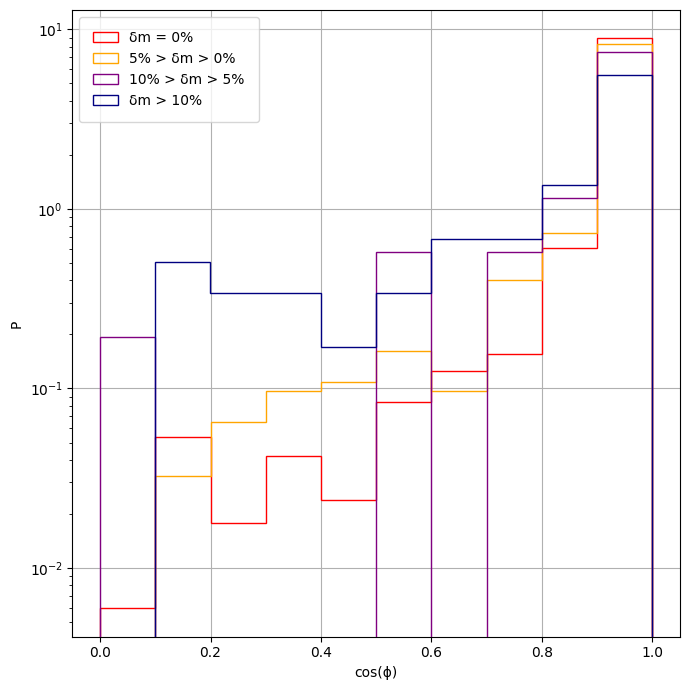

In [39]:
# Plotting the merger ratio groups

scale=7
N_bins= 10

fig, ax = subplots()

ax.hist(cosd.(mergers_e0["ϕ_flip"]), range=(0,maximum(cosd.(mergers_e0["ϕ_flip"]))), bins=N_bins, label="δm = 0%", density=true, log=true, rwidth=0.9, color="red", histtype="step", alpha=1, zorder=1)#, edgecolor="black")
ax.hist(cosd.(mergers_g0["ϕ_flip"]), range=(0,maximum(cosd.(mergers_g0["ϕ_flip"]))), bins=N_bins, label="5% > δm > 0%", density=true, log=true, rwidth=0.9, color="orange", histtype="step", alpha=1, zorder=1)#, edgecolor="black")
ax.hist(cosd.(mergers_g5["ϕ_flip"]), range=(0,maximum(cosd.(mergers_g5["ϕ_flip"]))), bins=N_bins, label="10% > δm > 5%", density=true, log=true, rwidth=0.9, color="purple", histtype="step", alpha=1, zorder=1)#, edgecolor="black")
ax.hist(cosd.(mergers_g10["ϕ_flip"]), range=(0,maximum(cosd.(mergers_g10["ϕ_flip"]))), bins=N_bins, label="δm > 10%", density=true, log=true, rwidth=0.9, color="navy", histtype="step", alpha=1, zorder=1)#, edgecolor="black")
#ax.plot(xaxis_angles, all_random, "-", lw=3, color="red", label="Random Angles", alpha=0.8, zorder=4)
#ax.plot(xaxis_angles, sind.(xaxis_angles) .* length(angle_data["ANGLES"])./2, "-", lw=2, color="cyan", label="Random Angles", alpha=0.8, zorder=4)
#ax.bar(flipangle, height=3000, label="Flip Angle", color="black", zorder=5)

#ax.set_title("Instant Spin Orientation Change")
ax.set_xlabel("cos(ϕ)")
ax.set_ylabel("P")
#ax.set_yscale("log")
ax.legend(loc="upper left", frameon=true, borderpad=1, handlelength=1.8)
ax.grid()


fig.set_size_inches(scale, scale)
fig.tight_layout()

#fig.savefig(joinpath(@__DIR__, "plots/like_Welker2014F1.png"), bbox_inches="tight", pad_inches=.1)

In [100]:
# Plotting the merger ratio groups

scale=5
N_bins= 10


n_e0, x_e0      = hist( cosd.(replace(mergers_e0["ϕ_flip"], missing=>NaN)), 
    range=(0,1),#maximum(cosd.(mergers_e0["ϕ_flip"]))), 
    bins=N_bins, density=true, log=true, rwidth=0.9, histtype="step", alpha=1, zorder=1)#, edgecolor="black")
n_g0, x_g0      = hist( cosd.(replace(mergers_g0["ϕ_flip"], missing=>NaN)), 
    range=(0,1),#maximum(cosd.(mergers_g0["ϕ_flip"]))), 
    bins=N_bins, density=true, log=true, rwidth=0.9, histtype="step", alpha=1, zorder=1)#, edgecolor="black")
n_g5, x_g5      = hist( cosd.(replace(mergers_g5["ϕ_flip"], missing=>NaN)), 
    range=(0,1),#maximum(cosd.(mergers_g5["ϕ_flip"]))), 
    bins=N_bins, density=true, log=true, rwidth=0.9, histtype="step", alpha=1, zorder=1)#, edgecolor="black")
n_g10, x_g10    = hist( cosd.(replace(mergers_g10["ϕ_flip"], missing=>NaN)), 
    range=(0,1),#maximum(cosd.(mergers_g10["ϕ_flip"]))), 
    bins=N_bins, density=true,log=true,rwidth=0.9, histtype="step", alpha=1, zorder=1)#, edgecolor="black")

bcenters_e0     = 0.5*(x_e0[2:end]  + x_e0[1:end-1])
bcenters_g0     = 0.5*(x_g0[2:end]  + x_g0[1:end-1])
bcenters_g5     = 0.5*(x_g5[2:end]  + x_g5[1:end-1])
bcenters_g10    = 0.5*(x_g10[2:end] + x_g10[1:end-1])

clf()

fig, ax = subplots()
ax.plot(bcenters_e0 , n_e0 , ".-", ms=10, label="δm = 0%,       N = $(length(mergers_e0["ϕ_flip"] ))" , color="red"   )
ax.plot(bcenters_g0 , n_g0 , ".-", ms=10, label="5% > δm > 0%,  N = $(length(mergers_g0["ϕ_flip"] ))" , color="orange")
ax.plot(bcenters_g5 , n_g5 , ".-", ms=10, label="10% > δm > 5%, N = $(length(mergers_g5["ϕ_flip"] ))" , color="purple")
ax.plot(bcenters_g10, n_g10, ".-", ms=10, label="δm > 10%,      N = $(length(mergers_g10["ϕ_flip"]))" , color="blue"  )


ax.set_xlabel("cos(ϕ)")
ax.set_ylabel("P")
ax.set_yscale("log")
#ax.set_xlim(0,)
ax.set_ylim(1e-3,)
ax.legend(loc="upper left", frameon=true, borderpad=1, handlelength=1.8)
ax.grid()


fig.set_size_inches(scale, scale)
fig.tight_layout()

fig.savefig(joinpath(@__DIR__, "plots/like_Welker2014F1_$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)